# Bluebikes Analysis

### Necessary Imports, CSV Reading

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import datetime
pd.set_option('mode.chained_assignment', None) #Disable copy warnings

In [2]:
trips_df = pd.read_csv("202010-bluebikes-tripdata.csv")
stations_df = pd.read_csv("current_bluebikes_stations.csv")

In [3]:
trips_df.drop(columns=['start station latitude', 'start station longitude', 
                       "end station latitude", "end station longitude",
                      "bikeid", "usertype", "postal code"], inplace=True);

### Convert Datetime Strings to Datetime Objects
#### "%Y-%m-%d %H:%M:%S.%f"

In [4]:
trips_df['starttime']= pd.to_datetime(trips_df['starttime'])
trips_df['stoptime']= pd.to_datetime(trips_df['stoptime'])

In [5]:
#Extract date and time separately
trips_df['start_time_only'] = trips_df['starttime'].dt.time
trips_df['stop_time_only'] = trips_df['stoptime'].dt.time
trips_df['start_date_only'] = trips_df['starttime'].dt.date
trips_df['stop_date_only'] = trips_df['stoptime'].dt.date

#mass_essex_df.head()

Convert times to seconds only

In [6]:
# this function converts times to seconds, ignoring milliseconds
def get_sec(df):
    time_list = []
    for time in df:
        time_list.append((time.hour * 3600) + (time.minute * 60) + time.second)
    return pd.Series(time_list)

In [7]:
trips_df['start_time_only_seconds']=get_sec(trips_df['start_time_only'])
trips_df['stop_time_only_seconds']=get_sec(trips_df['stop_time_only'])
trips_df.head()

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,start_time_only,stop_time_only,start_date_only,stop_date_only,start_time_only_seconds,stop_time_only_seconds
0,230,2020-10-01 00:00:21.214,2020-10-01 00:04:12.081,104,Harvard University Radcliffe Quadrangle at She...,74,Harvard Square at Mass Ave/ Dunster,00:00:21.214000,00:04:12.081000,2020-10-01,2020-10-01,21,252
1,1009,2020-10-01 00:01:07.214,2020-10-01 00:17:57.062,227,Silber Way,68,Central Square at Mass Ave / Essex St,00:01:07.214000,00:17:57.062000,2020-10-01,2020-10-01,67,1077
2,188,2020-10-01 00:02:08.794,2020-10-01 00:05:16.824,380,Mass Ave at Albany St,178,MIT Pacific St at Purrington St,00:02:08.794000,00:05:16.824000,2020-10-01,2020-10-01,128,316
3,1016,2020-10-01 00:03:29.260,2020-10-01 00:20:26.141,346,Cleveland Circle,160,Wentworth Institute of Technology - Huntington...,00:03:29.260000,00:20:26.141000,2020-10-01,2020-10-01,209,1226
4,1147,2020-10-01 00:03:48.148,2020-10-01 00:22:55.721,46,Christian Science Plaza - Massachusetts Ave at...,128,E Cottage St at Columbia Rd,00:03:48.148000,00:22:55.721000,2020-10-01,2020-10-01,228,1375


### Extract names of stations

In [8]:
#Get all the stations according to supplemental dataset
s = stations_df.Name.unique()
station_name_set=set(s)

In [9]:
# Unique start stations
st = trips_df["start station name"].unique()
station_start_set = set(st)

In [10]:
# Unique end stations
sta = trips_df["end station name"].unique()
station_end_set = set(sta)

In [11]:
# Unique start end stations
start_end_station_names = station_start_set.union(station_end_set)

In [12]:
#All stations
all_station_names = start_end_station_names.union(station_name_set)

In [13]:
uncovered_stations = station_name_set.difference(start_end_station_names)

### Get number of starts per station

In [14]:
by_start_df = trips_df.groupby("start station name").count()
by_start_df.sort_values(by=["tripduration"], ascending=False, inplace=True)
by_start_df.to_csv("CSVs/start_ranked_stations.csv")
by_start_df.head()

,tripduration,starttime,stoptime,start station id,end station id,end station name,start_time_only,stop_time_only,start_date_only,stop_date_only,start_time_only_seconds,stop_time_only_seconds
start station name,,,,,,,,,,,,
Central Square at Mass Ave / Essex St,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362
Charles Circle - Charles St at Cambridge St,3656,3656,3656,3656,3656,3656,3656,3656,3656,3656,3656,3656
Beacon St at Massachusetts Ave,3565,3565,3565,3565,3565,3565,3565,3565,3565,3565,3565,3565
MIT at Mass Ave / Amherst St,3432,3432,3432,3432,3432,3432,3432,3432,3432,3432,3432,3432
Christian Science Plaza - Massachusetts Ave at Westland Ave,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132


### Get number of stops per station

In [15]:
by_stop_df = trips_df.groupby("end station name").count()
by_stop_df.sort_values(by=["tripduration"], ascending=False, inplace=True)
by_stop_df.to_csv("CSVs/stop_ranked_stations.csv")
by_stop_df.head()

,tripduration,starttime,stoptime,start station id,start station name,end station id,start_time_only,stop_time_only,start_date_only,stop_date_only,start_time_only_seconds,stop_time_only_seconds
end station name,,,,,,,,,,,,
Central Square at Mass Ave / Essex St,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
Charles Circle - Charles St at Cambridge St,3682,3682,3682,3682,3682,3682,3682,3682,3682,3682,3682,3682
Beacon St at Massachusetts Ave,3551,3551,3551,3551,3551,3551,3551,3551,3551,3551,3551,3551
Ames St at Main St,3388,3388,3388,3388,3388,3388,3388,3388,3388,3388,3388,3388
MIT at Mass Ave / Amherst St,3267,3267,3267,3267,3267,3267,3267,3267,3267,3267,3267,3267


### Merge Stop and Start to get total volume

In [16]:
station_volumes = []
for station_name in start_end_station_names:
    try:starts = by_start_df.loc[station_name][0]
    except: starts = 0
    try: stops = by_stop_df.loc[station_name][0]
    except: stops = 0
    volume = starts+stops
    result = [station_name, volume, starts, stops]
    station_volumes.append(result)

station_volume_df = pd.DataFrame(data=station_volumes, columns = ["station_name", "volume", "starts", "stops"])    

#Add unused stations with 0s for all entries
for name in uncovered_stations:
    station_volume_df.loc[len(station_volume_df)] = [name, 0,0,0]
    
#Index by name and sort descending
station_volume_df.set_index("station_name", inplace = True)
station_volume_df.sort_values(by=["volume"], ascending=False, inplace=True)

station_volume_df.to_csv("CSVs/volume_ranked_stations.csv")

station_volume_df

,volume,starts,stops
station_name,,,
Central Square at Mass Ave / Essex St,8786,4362,4424
Charles Circle - Charles St at Cambridge St,7338,3656,3682
Beacon St at Massachusetts Ave,7116,3565,3551
MIT at Mass Ave / Amherst St,6699,3432,3267
Ames St at Main St,6326,2938,3388
...,...,...,...
St Mary's,0,0,0
Graham and Parks School ? Linnaean St at Walker St,0,0,0
Revere Public Library,0,0,0


## Distribution Analysis

In [17]:
def analyze_station(station_name, print_plot=False):
    if print_plot==True:
        #Create output plots
        fig, axs = plt.subplots(2,2)

    #Filter to be only current station
    is_station = trips_df["start station name"]== station_name
    station_df = trips_df[is_station]

    # Access the next row, subtract to get interarrivals
    station_df['next_starttime'] = station_df['starttime'].shift(periods=-1) 
    station_df['inter_start'] = station_df['next_starttime'].subtract(station_df['starttime'])
    station_df.drop(station_df.tail(1).index,inplace=True) #Last one NaN - drop
    station_df['inter_start_seconds']=station_df['inter_start'].dt.total_seconds() #Convert to seconds

    #Check for NaN
    notNaN = station_df['inter_start']!=float('nan')
    station_df = station_df[notNaN]
    
    if print_plot==True:
    #Plot start times at (0,0)
        axs[0, 0].hist(station_df['start_time_only_seconds'], bins = 20)
        axs[0, 0].set_title("Starts")

    #Restrict time frame to times between 7am and 11pm (23)
    shape_pre_filter = station_df.shape

    after_7 = station_df['start_time_only']>=datetime.time(7,0,0)
    station_df=station_df[after_7]
    trips_before_7 = station_df.shape[0] - shape_pre_filter[0]

    before_11 = station_df['start_time_only']<=datetime.time(23,0,0)
    station_df=station_df[before_11]
    trips_after_11 = station_df.shape[0] - shape_pre_filter[0] - trips_before_7

    #Imports for distribution fitting
    import scipy.stats as st
    distributions = [st.expon, st.fatiguelife, st.norm, st.foldcauchy]

    #Fit start times to a distribution
    max_start_p = -1
    best_start_dis = None
    best_start_params = None

    for i, distribution in enumerate(distributions):
        params = distribution.fit(station_df['start_time_only_seconds'])
        kstest= st.kstest(station_df['start_time_only_seconds'], distribution.cdf, args=params)
        if kstest.pvalue>max_start_p:
            max_start_p = kstest.pvalue
            best_start_dis = distribution
            best_start_params=params

    #Fit interarrival times to a distribution
    max_interstart_p = -1
    best_interstart_dis = None
    best_interstart_params = None

    for i, distribution in enumerate(distributions):
        params = distribution.fit(station_df['inter_start_seconds'])
        kstest= st.kstest(station_df['inter_start_seconds'], distribution.cdf, args=params)
        if kstest.pvalue>max_interstart_p:
            max_interstart_p = kstest.pvalue
            best_interstart_dis = distribution
            best_interstart_params=params
    
    if print_plot==True:
        #loop to plot both inter_start and start
        to_plot = ['inter_start_seconds', 'start_time_only_seconds']
        positions = [(1,1),(0,1)]
        distrubutions = [best_interstart_dis, best_start_dis]
        maxXs = [5000, 24*3600]

        for i in range(2):
            best_dis = distrubutions[i]

            #Extract samples
            params = best_dis.fit(station_df[to_plot[i]])
            try:
                samples = best_dis.rvs(params[0], loc=params[1], scale=params[2], size=10000, random_state=None)
            except:
                samples = best_dis.rvs(loc=params[0], scale=params[1], size=10000, random_state=None)

            #Get proper subfigure
            ax1 = axs[positions[i][0], positions[i][1]]

            maxX = maxXs[i]
            #Create distribution 
            if maxX<10000:
                t = np.arange(0, maxX, 2)
            else:
                t = np.arange(0, maxX, 5)

            try:
                distr = best_dis.pdf(t, params[0], params[1], params[2])
            except:
                distr = best_dis.pdf(t, params[0], params[1])

            # plot histogram
            color = 'tab:blue'
            ax1.set_xlabel('time (s)')
            ax1.set_ylabel('Count(#) - hist', color=color)
            ax1.hist(station_df[to_plot[i]],bins=20, range = (0,maxX))
            ax1.tick_params(axis='y', labelcolor=color)

            ax2 = ax1.twinx()

            # plot distribution
            color = 'tab:red'
            ax2.set_ylabel('Prob(t=x)', color=color)
            ax2.plot(t, distr, color=color)
            #ax2.hist(samples, color=color)
            ax2.tick_params(axis='y', labelcolor=color)

            #Title
            plt.title(to_plot[i] + " - " + best_dis.name)

        plt.tight_layout()
        
    return [station_name, 
            best_interstart_dis,
            best_interstart_params,
            station_df['inter_start_seconds'].mean(), 
            station_df['inter_start_seconds'].quantile(.25), 
            station_df['inter_start_seconds'].quantile(.75),
            best_start_dis,
            best_start_params,
            station_df['start_time_only_seconds'].mean(), 
            station_df['start_time_only_seconds'].quantile(.25), 
            station_df['start_time_only_seconds'].quantile(.75)]

In [18]:
#Loop through all start stations
station_analysis_results = []

counter = 0
for station_name in by_start_df.index:
    if counter == 365:
        break
    station_analysis_results.append(analyze_station(station_name))
    counter+=1

/Users/alandler/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [19]:
station_analysis_df = pd.DataFrame(station_analysis_results, 
                                   columns = ["station_name",
                                              "interstart_dis",
                                              "interstart_params",
                                             "interstart_mean",
                                             "interstart_25",
                                             "interstart_75",
                                             "start_dis",
                                              "start_params",
                                             "start_mean",
                                             "start_25",
                                             "start_75"])
station_analysis_df.to_csv("CSVs/station_analyses.csv")

## Get top start/end hours per station

In [17]:
# this function gets the hour from the time
def get_hour(df):
    time_list = []
    for time in df:
        time_list.append(time.hour)
    return pd.Series(time_list)

In [18]:
trips_df["start_hour"] = get_hour(trips_df["starttime"])
trips_df["stop_hour"] = get_hour(trips_df["stoptime"])

In [26]:
def extract_top_hours(station_name):
    
    #Filter to be only current station starts
    is_station_start = trips_df["start station name"]== station_name
    start_station_df = trips_df[is_station_start]
    
    #Filter to be only current station ends
    is_station_stop = trips_df["end station name"]== station_name
    stop_station_df = trips_df[is_station_stop]
    
    #Group by hour-count
    start_hours_df_count = start_station_df.groupby("start_hour").count()
    stop_hours_df_count = stop_station_df.groupby("stop_hour").count()
    
    #Sort by the most populated hour to least populated hour
    start_hours_df_count.sort_values(by=["tripduration"], ascending=False, inplace=True)
    stop_hours_df_count.sort_values(by=["tripduration"], ascending=False, inplace=True)
    
    #Extract sorted indices (most to least occurences in that hour)
    start_order = start_hours_df_count.index.tolist()
    stop_order = stop_hours_df_count.index.tolist()
    
    return start_order, stop_order

In [34]:
#Dict {rank: [hour, hour, ...]} 
start_hours = {}
stop_hours = {}

for i in range(24):
    start_hours[i] = []
    stop_hours[i] = []

#Loop through all start stations
for station_name in by_start_df.index:
    start_order, stop_order = extract_top_hours(station_name)
    for i, hour in enumerate(start_order):
        start_hours[i].append(hour)
    for i, hour in enumerate(stop_order):
        stop_hours[i].append(hour)

In [41]:
from statistics import mean, pstdev

mean_start_hour = mean(start_hours[0])
std_start_hour = pstdev(start_hours[0])

mean_stop_hour = mean(stop_hours[0])
std_stop_hour = pstdev(stop_hours[0])
print(mean_start_hour)

14.898907103825136


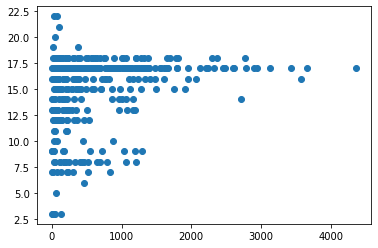

In [38]:
plt.scatter(by_start_df["tripduration"], start_hours[0])

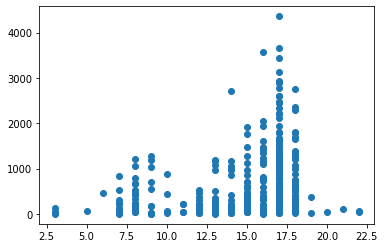

In [39]:
plt.scatter(start_hours[0],by_start_df["tripduration"])

(array([  5.,   2.,  27.,  16.,  22.,  41.,  70., 177.,   3.,   3.]),
 array([ 3. ,  4.9,  6.8,  8.7, 10.6, 12.5, 14.4, 16.3, 18.2, 20.1, 22. ]),
 <BarContainer object of 10 artists>)

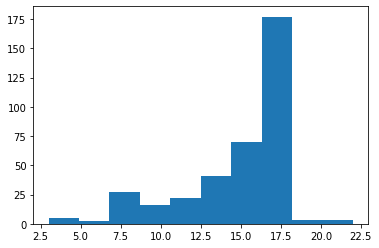

In [40]:
plt.hist(start_hours[0])

## Compare Arrivals and Departures

In [27]:
#Run if the above section was not
def get_hour(df):
    time_list = []
    for time in df:
        time_list.append(time.hour)
    return pd.Series(time_list)

trips_df["start_hour"] = get_hour(trips_df["starttime"])
trips_df["stop_hour"] = get_hour(trips_df["stoptime"])

In [28]:
def get_arrival_departure_curves(station_name):
    
    #Filter to be only current station starts
    is_station_start = trips_df["start station name"]== station_name
    start_station_df = trips_df[is_station_start]
    
    #Filter to be only current station ends
    is_station_stop = trips_df["end station name"]== station_name
    stop_station_df = trips_df[is_station_stop]
    
    #Group by hour-count
    start_hours_df_count = start_station_df.groupby("start_hour").count()
    stop_hours_df_count = stop_station_df.groupby("stop_hour").count()
    
    
    #For each hour, get the difference between the arrivals(stop) and departures (start) (D-A)
    diffs = [station_name]
    departures = [station_name]
    arrivals = [station_name]
    for i in range(24):
        try:
            diffs.append(start_hours_df_count.iloc[i]["tripduration"]-stop_hours_df_count.iloc[i]["tripduration"])
        except:
            diffs.append(None)
        try:
            departures.append(start_hours_df_count.iloc[i]["tripduration"])
        except: 
            departures.append(None)
        try:
            arrivals.append(stop_hours_df_count.iloc[i]["tripduration"])
        except: 
            arrivals.append(None)
    return (diffs, departures, arrivals)

In [29]:
#For every station
diffs = []
arrivals = []
departures = []
for station_name in by_start_df.index:
    diff, dep, arr = get_arrival_departure_curves(station_name)
    diffs.append(diff)
    departures.append(dep)
    arrivals.append(arr)

    
hours_as_strings = [str(x) for x in range (24)]
arr_dep_cols = [x for x in hours_as_strings]
arr_dep_cols.insert(0, "station_name")
    
arrivals_df = pd.DataFrame(data=arrivals, columns = arr_dep_cols)
arrivals_df.set_index("station_name", inplace=True)
arrivals_df.reindex(by_start_df.index)

departures_df = pd.DataFrame(data=departures, columns = arr_dep_cols)
departures_df.set_index("station_name", inplace=True)
departures_df.reindex(by_start_df.index)

diffs_df = pd.DataFrame(data=diffs, columns = arr_dep_cols)
diffs_df.set_index("station_name", inplace=True);
diffs_df.reindex(by_start_df.index)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start station name,,,,,,,,,,,,,,,,,,,,,
Central Square at Mass Ave / Essex St,-1,2.0,-10.0,0.0,3.0,-1.0,-10.0,-1.0,-30.0,16.0,...,1.0,-3.0,-12.0,-39.0,-24.0,-35.0,10.0,0.0,13.0,-2.0
Charles Circle - Charles St at Cambridge St,-9,1.0,8.0,0.0,1.0,-14.0,-134.0,-10.0,-1.0,-37.0,...,9.0,67.0,4.0,66.0,3.0,61.0,-15.0,-14.0,11.0,-29.0
Beacon St at Massachusetts Ave,-20,9.0,-5.0,4.0,14.0,11.0,11.0,37.0,27.0,46.0,...,-84.0,-38.0,-28.0,-25.0,101.0,11.0,34.0,-4.0,35.0,NaN
MIT at Mass Ave / Amherst St,18,7.0,0.0,-2.0,-3.0,-5.0,-20.0,-72.0,-34.0,-61.0,...,-10.0,43.0,65.0,93.0,78.0,73.0,59.0,53.0,29.0,21.0
Christian Science Plaza - Massachusetts Ave at Westland Ave,8,-39.0,-1.0,-20.0,-7.0,17.0,48.0,-8.0,42.0,16.0,...,6.0,-48.0,-15.0,-30.0,-10.0,-45.0,-19.0,-17.0,29.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kearins Playground,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BCBS Quincy,0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day Sq,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
arrivals_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
station_name,,,,,,,,,,,,,,,,,,,,,
Central Square at Mass Ave / Essex St,27,18.0,15.0,6.0,2.0,9.0,18.0,67.0,151.0,152.0,...,311.0,362.0,397.0,518.0,482.0,392.0,228.0,154.0,101.0,69.0
Charles Circle - Charles St at Cambridge St,39,29.0,17.0,5.0,3.0,24.0,168.0,155.0,193.0,191.0,...,258.0,266.0,323.0,312.0,316.0,178.0,117.0,92.0,71.0,63.0
Beacon St at Massachusetts Ave,69,34.0,13.0,9.0,4.0,10.0,42.0,74.0,116.0,126.0,...,312.0,314.0,377.0,366.0,225.0,192.0,143.0,110.0,78.0,NaN
MIT at Mass Ave / Amherst St,25,13.0,9.0,12.0,7.0,6.0,21.0,102.0,120.0,153.0,...,258.0,254.0,264.0,341.0,277.0,176.0,122.0,63.0,50.0,42.0
Christian Science Plaza - Massachusetts Ave at Westland Ave,50,86.0,26.0,26.0,12.0,14.0,6.0,75.0,89.0,123.0,...,210.0,232.0,261.0,347.0,322.0,222.0,147.0,131.0,84.0,50.0


In [31]:
diffs_df.to_csv("CSVs/diffs.csv")
departures_df.to_csv("CSVs/departures.csv")
arrivals_df.to_csv("CSVs/arrivals.csv")

## Create CDFs

In [32]:
#import original amount of bikes
station_info = pd.read_csv("current_bluebikes_stations.csv") #Relevant columns: "Name", "Total docks"
station_info.set_index("Name", inplace = True) #Access based on name
station_info.head()

,Number,Latitude,Longitude,District,Public,Total docks
Name,,,,,,
175 N Harvard St,A32019,42.363796,-71.129164,Boston,Yes,18
191 Beacon St,S32035,42.380323,-71.108786,Somerville,Yes,19
30 Dane St,S32023,42.381001,-71.104025,Somerville,Yes,15
359 Broadway - Broadway at Fayette Street,M32026,42.370803,-71.104412,Cambridge,Yes,23
645 Summer St,C32091,42.341781,-71.039870,Boston,Yes,19


In [33]:
#Extract rows
i = 0
station_name_order = []
original_bikes = []

for row in station_info.iterrows():
    station_name = row[0]
    og_num = row[1]["Total docks"]
    station_name_order.append(station_name)
    original_bikes.append(og_num)
    i+=1
    
og_df = pd.DataFrame(data={"Name": station_name_order, "total_docks": original_bikes})
og_df.set_index("Name", inplace=True)
og_df.head()

,total_docks
Name,
175 N Harvard St,18
191 Beacon St,19
30 Dane St,15
359 Broadway - Broadway at Fayette Street,23
645 Summer St,19


In [34]:
# Mean number of docks
og_df["total_docks"].mean()

17.423076923076923

In [35]:
#Create cumulative functions for A and D, returned as tuple (A, D)
#[station name, OG, 0:23]
def get_cumulative(station_name, zero_start = True):
    if zero_start == True:
        num_bikes = 0
        num_empty = 0
    else:
        try:
            num_bikes = int(og_df.loc[station_name]["total_docks"]*.75) #Assume all start 3/4 full
            num_empty = og_df.loc[station_name]["total_docks"]-int(og_df.loc[station_name]["total_docks"]*.75) #Rest of the bikes
        except:
            num_bikes = 12
            num_empty = 4
    num_bikes*=30
    num_empty*=30
    
    cumulative_arrivals = [station_name, num_bikes]
    cumulative_departures = [station_name, num_empty]
    cumulative_diffs = [station_name, num_bikes]

    for i in range (2,26):
        cumulative_arrivals.append(cumulative_arrivals[i-1]+arrivals_df.loc[station_name][str(i-2)])
        cumulative_departures.append(cumulative_departures[i-1]+departures_df.loc[station_name][str(i-2)])
        cumulative_diffs.append(cumulative_diffs[i-1]+diffs_df.loc[station_name][str(i-2)])



    return (cumulative_arrivals, cumulative_departures, cumulative_diffs)

In [36]:
cumulative_arrivals = []
cumulative_departures = []
cumulative_num_bikes = []
for station_name in by_start_df.index:
    c_arrival, c_departure, c_diff = get_cumulative(station_name, False)
    cumulative_arrivals.append(c_arrival)
    cumulative_departures.append(c_departure)
    cumulative_num_bikes.append(c_diff)

cumul_columns = [x for x in arr_dep_cols]
cumul_columns.insert(1,"OG")

cumulative_arrivals_df = pd.DataFrame(data=cumulative_arrivals, columns = cumul_columns)
cumulative_arrivals_df.set_index("station_name", inplace=True)
cumulative_arrivals_df.reindex(by_start_df.index)

cumulative_departures_df = pd.DataFrame(data=cumulative_departures, columns = cumul_columns)
cumulative_departures_df.set_index("station_name", inplace=True)
cumulative_departures_df.reindex(by_start_df.index)

cumulative_num_bikes_df = pd.DataFrame(data=cumulative_num_bikes, columns = cumul_columns)
cumulative_num_bikes_df.set_index("station_name", inplace=True)
cumulative_num_bikes_df.reindex(by_start_df.index)

,OG,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
start station name,,,,,,,,,,,,,,,,,,,,,
Central Square at Mass Ave / Essex St,420,419.0,421.0,411.0,411.0,414.0,413.0,403.0,402.0,372.0,...,450.0,447.0,435.0,396.0,372.0,337.0,347.0,347.0,360.0,358.0
Charles Circle - Charles St at Cambridge St,420,411.0,412.0,420.0,420.0,421.0,407.0,273.0,263.0,262.0,...,240.0,307.0,311.0,377.0,380.0,441.0,426.0,412.0,423.0,394.0
Beacon St at Massachusetts Ave,420,400.0,409.0,404.0,408.0,422.0,433.0,444.0,481.0,508.0,...,296.0,258.0,230.0,205.0,306.0,317.0,351.0,347.0,382.0,NaN
MIT at Mass Ave / Amherst St,600,618.0,625.0,625.0,623.0,620.0,615.0,595.0,523.0,489.0,...,251.0,294.0,359.0,452.0,530.0,603.0,662.0,715.0,744.0,765.0
Christian Science Plaza - Massachusetts Ave at Westland Ave,420,428.0,389.0,388.0,368.0,361.0,378.0,426.0,418.0,460.0,...,533.0,485.0,470.0,440.0,430.0,385.0,366.0,349.0,378.0,404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kearins Playground,240,242.0,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BCBS Quincy,360,360.0,359.0,359.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day Sq,360,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
cumulative_arrivals_df.to_csv("CSVs/cumulative_arrivals.csv")
cumulative_departures_df.to_csv("CSVs/cumulative_departures.csv")
cumulative_num_bikes_df.to_csv("CSVs/cumulative_num_bikes.csv")

## Plot Cumulative A/D Curves

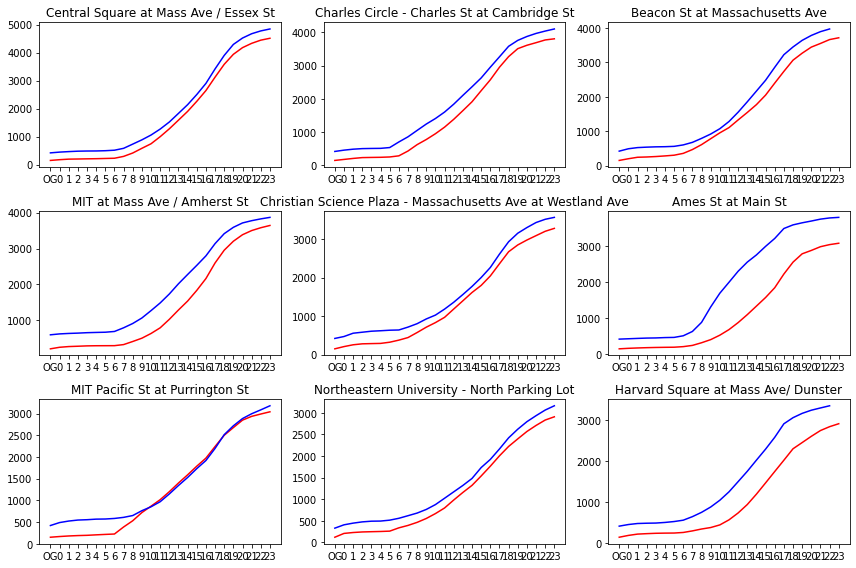

In [38]:
w = 3
h = 3
n = w*h
fig, axs = plt.subplots(w,h, figsize=(12, 8))
positions = [(int(i/w), i%w) for i in range(w*h)]

num_stations = 9
counter = 0

#plot departure curves
for i in range(9):
    axs[positions[counter][0], positions[counter][1]].plot(cumulative_departures_df.iloc[i], color = "red")
    axs[positions[counter][0], positions[counter][1]].set_title(cumulative_departures_df.index[i])
    counter+=1
counter = 0

#plot arrival curves
for i in range(9):
    axs[positions[counter][0], positions[counter][1]].plot(cumulative_arrivals_df.iloc[i], color = "blue")
    axs[positions[counter][0], positions[counter][1]].set_title(cumulative_arrivals_df.index[i])
    counter+=1
    
plt.tight_layout()

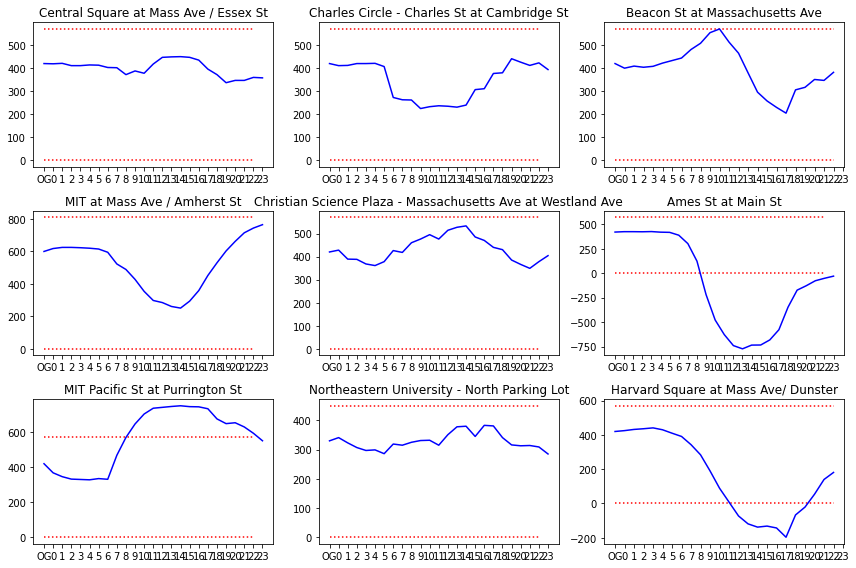

In [39]:
w = 3
h = 3
n = w*h
fig, axs = plt.subplots(w,h, figsize=(12, 8))
positions = [(int(i/w), i%w) for i in range(w*h)]

num_stations = 9
counter = 0

#plot departure curves
for i in range(9):
    axs[positions[counter][0], positions[counter][1]].plot(cumulative_num_bikes_df.iloc[i], color = "blue")
    axs[positions[counter][0], positions[counter][1]].set_title(cumulative_num_bikes_df.index[i])
    upper_bound = og_df.loc[cumulative_num_bikes_df.index[i]]['total_docks']*30
    axs[positions[counter][0], positions[counter][1]].hlines(upper_bound, 0, 23, color="red", linestyles='dotted')
    axs[positions[counter][0], positions[counter][1]].hlines(0, 0, 23, color="red", linestyles='dotted')
    counter+=1
counter = 0
    
plt.tight_layout()

## Plot Arrivals and Departures

In [41]:
diffs_df = pd.read_csv("CSVs/diffs.csv")

In [42]:
type(diffs_df.iloc[1:25])

pandas.core.frame.DataFrame

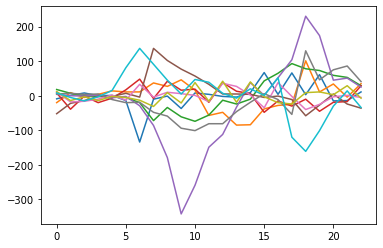

In [43]:
num_stations = 10
for row in diffs_df.iloc[1:num_stations+1].iterrows():
    times = [row[1][i] for i in range (1,24)]
    plt.plot(times)

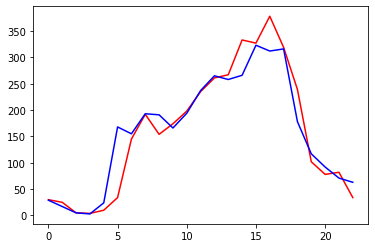

In [44]:
num_stations = 1
for row in departures_df.iloc[1:num_stations+1].iterrows():
    times = [row[1][i] for i in range (1,24)]
    plt.plot(times, color = "red")
for row in arrivals_df.iloc[1:num_stations+1].iterrows():
    times = [row[1][i] for i in range (1,24)]
    plt.plot(times, color = "blue")

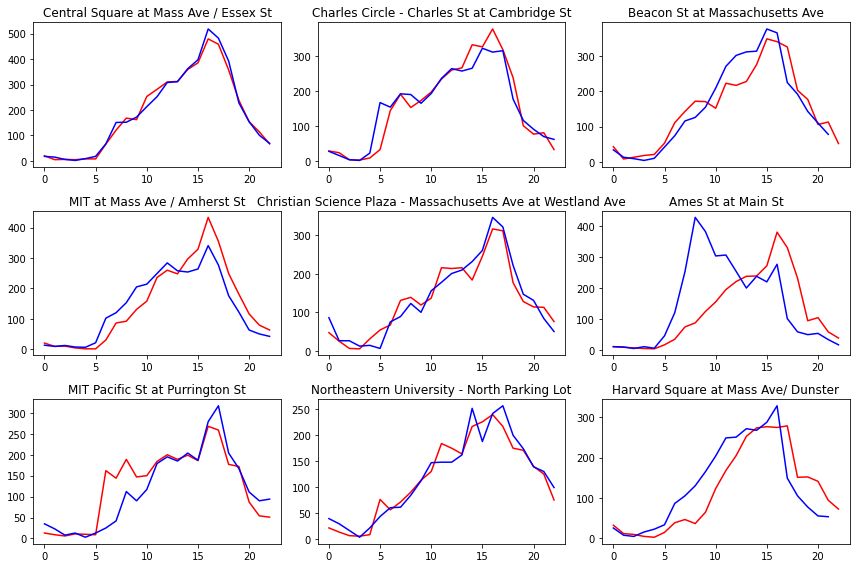

In [45]:
w = 3
h = 3
n = w*h
fig, axs = plt.subplots(w,h, figsize=(12, 8))
positions = [(int(i/w), i%w) for i in range(w*h)]

num_stations = 9
counter = 0

#plot departure curves
for row in departures_df.iloc[0:num_stations].iterrows():
    times = [row[1][i] for i in range (1,24)]
    axs[positions[counter][0], positions[counter][1]].plot(times, color = "red")
    axs[positions[counter][0], positions[counter][1]].set_title(row[0])
    counter+=1
counter = 0

#plot arrival curves
for row in arrivals_df.iloc[0:num_stations].iterrows():
    times = [row[1][i] for i in range (1,24)]
    axs[positions[counter][0], positions[counter][1]].plot(times, color = "blue")
    axs[positions[counter][0], positions[counter][1]].set_title(row[0])
    counter+=1
    
plt.tight_layout()